In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

# Plotting params

In [2]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # Times for publication
    "font.size": 11,                    # Base font size
    "axes.labelsize": 11,              # Axis label font size
    "axes.labelweight": "bold",         # Bold axis labels
    "font.weight": "bold",          # Bold font for all text
    "axes.titlesize": 11,              # Axis title (not fig title)
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,              # Legend font size

    "figure.dpi": 300,                 # Display resolution
    "savefig.dpi": 300,                # Save resolution
    "figure.figsize": (6.5,4),     # For 0.5\textwidth plot
    # "figure.constrained_layout.use": True,  # Better spacing than tight_layout

    "axes.linewidth": 0.8,             # Thin but clear axes lines
    "lines.linewidth": 1.2,
    "lines.markersize": 5,

    "axes.spines.top": False,
    "axes.spines.right": False,

    "xtick.direction": "in",
    "ytick.direction": "in", 
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,

    "legend.frameon": False,
    "legend.handlelength": 1.0,        # Slightly longer legend lines
    "legend.handletextpad": 0.5,

    "pdf.fonttype": 42,                # Embed editable fonts in PDF
    "ps.fonttype": 42
})

folder_name_png = 'PLOTS_IGT_SCORES_PNG'
folder_name_svg = 'PLOTS_IGT_SCORES_SVG'
save_fig = True
alpha = 1

# PD and Normal CONDITION

In [3]:
# Reading PD pickle file
# read pickle file
with open(r'DATA\igt_normal_simulation.pkl', 'rb') as f:
    normal_results_IGT = pickle.load(f)

with open(r'DATA\igt_pd_simulation.pkl', 'rb') as f:
    pd_results_IGT = pickle.load(f)

# Extracting PD results
IGT_simulated_pd = pd_results_IGT['IGT_sim']
IGT_std_simulated_pd = pd_results_IGT['IGT_sim_std']
n_sim_pd = pd_results_IGT['n_sim'] 

IGT_experimental_pd = pd_results_IGT['IGT_exp']
IGT_std_experimental_pd = pd_results_IGT['IGT_exp_std']
n_expt_pd = pd_results_IGT['n_expt']

# Extracting normal results
IGT_simulated_normal = normal_results_IGT['IGT_sim']
IGT_std_simulated_normal = normal_results_IGT['IGT_sim_std']
n_sim_normal = normal_results_IGT['n_sim']

IGT_experimental_normal = normal_results_IGT['IGT_exp']
IGT_std_experimental_normal = normal_results_IGT['IGT_exp_std']
n_expt_normal = normal_results_IGT['n_expt']
BINS = np.arange(5)+ 1


In [4]:
normal_results_IGT['statistical test']

,Index,Exp Mean,Sim Mean,t-stat,p-value,Significant,Conclusion
0,1,-1.83,0.20,-1.581,0.1254,False,Not statistically different
1,2,1.50,1.92,-0.270,0.7892,False,Not statistically different
2,3,2.60,2.28,0.222,0.8263,False,Not statistically different
3,4,4.59,3.92,0.570,0.5733,False,Not statistically different
4,5,3.90,3.80,0.080,0.9372,False,Not statistically different


# DBS CONDITION COMPARISON

In [5]:
# Read the data from the pickle file
with open("DATA/igt_5th_bin_scores_PD.pkl", "rb") as f:
    data_loaded_PD = pickle.load(f)

with open("DATA/igt_5th_bin_scores_DBS_open_loop_low_amp.pkl", "rb") as f:
    data_loaded_DBS_open_loop_lowamp = pickle.load(f)

with open("Data/igt_5th_bin_scores_DBS_open_loop_high_amp.pkl", "rb") as f:
    data_loaded_DBS_open_loop_highamp = pickle.load(f)

with open("Data/igt_5th_bin_scores_DBS_closed_loop.pkl", "rb") as f:
    data_loaded_DBS_close_loop = pickle.load(f)


with open("DATA/igt_5th_bin_scores_std_DBS.pkl", "rb") as f:
    data_loaded_std_DBS = pickle.load(f)

In [6]:
# Extract data from the loaded pickle files
del_lim_values_PD = data_loaded_PD["del_lim"]
igt_scores_PD = data_loaded_PD["igt_scores"]
igt_errors_PD = data_loaded_PD["igt_errors"]

del_lim_values_DBS_std = data_loaded_std_DBS["del_lim"]
igt_scores_DBS_std = data_loaded_std_DBS["igt_scores"]
igt_errors_DBS_std = data_loaded_std_DBS["igt_errors"]

del_lim_values_DBS_open_low = data_loaded_DBS_open_loop_lowamp["del_lim"]
igt_scores_DBS_open_low = data_loaded_DBS_open_loop_lowamp["igt_scores"]
igt_errors_DBS_open_low = data_loaded_DBS_open_loop_lowamp["igt_errors"]

del_lim_values_DBS_open_high = data_loaded_DBS_open_loop_highamp["del_lim"]
igt_scores_DBS_open_high = data_loaded_DBS_open_loop_highamp["igt_scores"]
igt_errors_DBS_open_high = data_loaded_DBS_open_loop_highamp["igt_errors"]/2

del_lim_values_DBS_closed = data_loaded_DBS_close_loop["del_lim"]
igt_scores_DBS_closed = data_loaded_DBS_close_loop["igt_scores"]
igt_errors_DBS_closed = data_loaded_DBS_close_loop["igt_errors"]/2

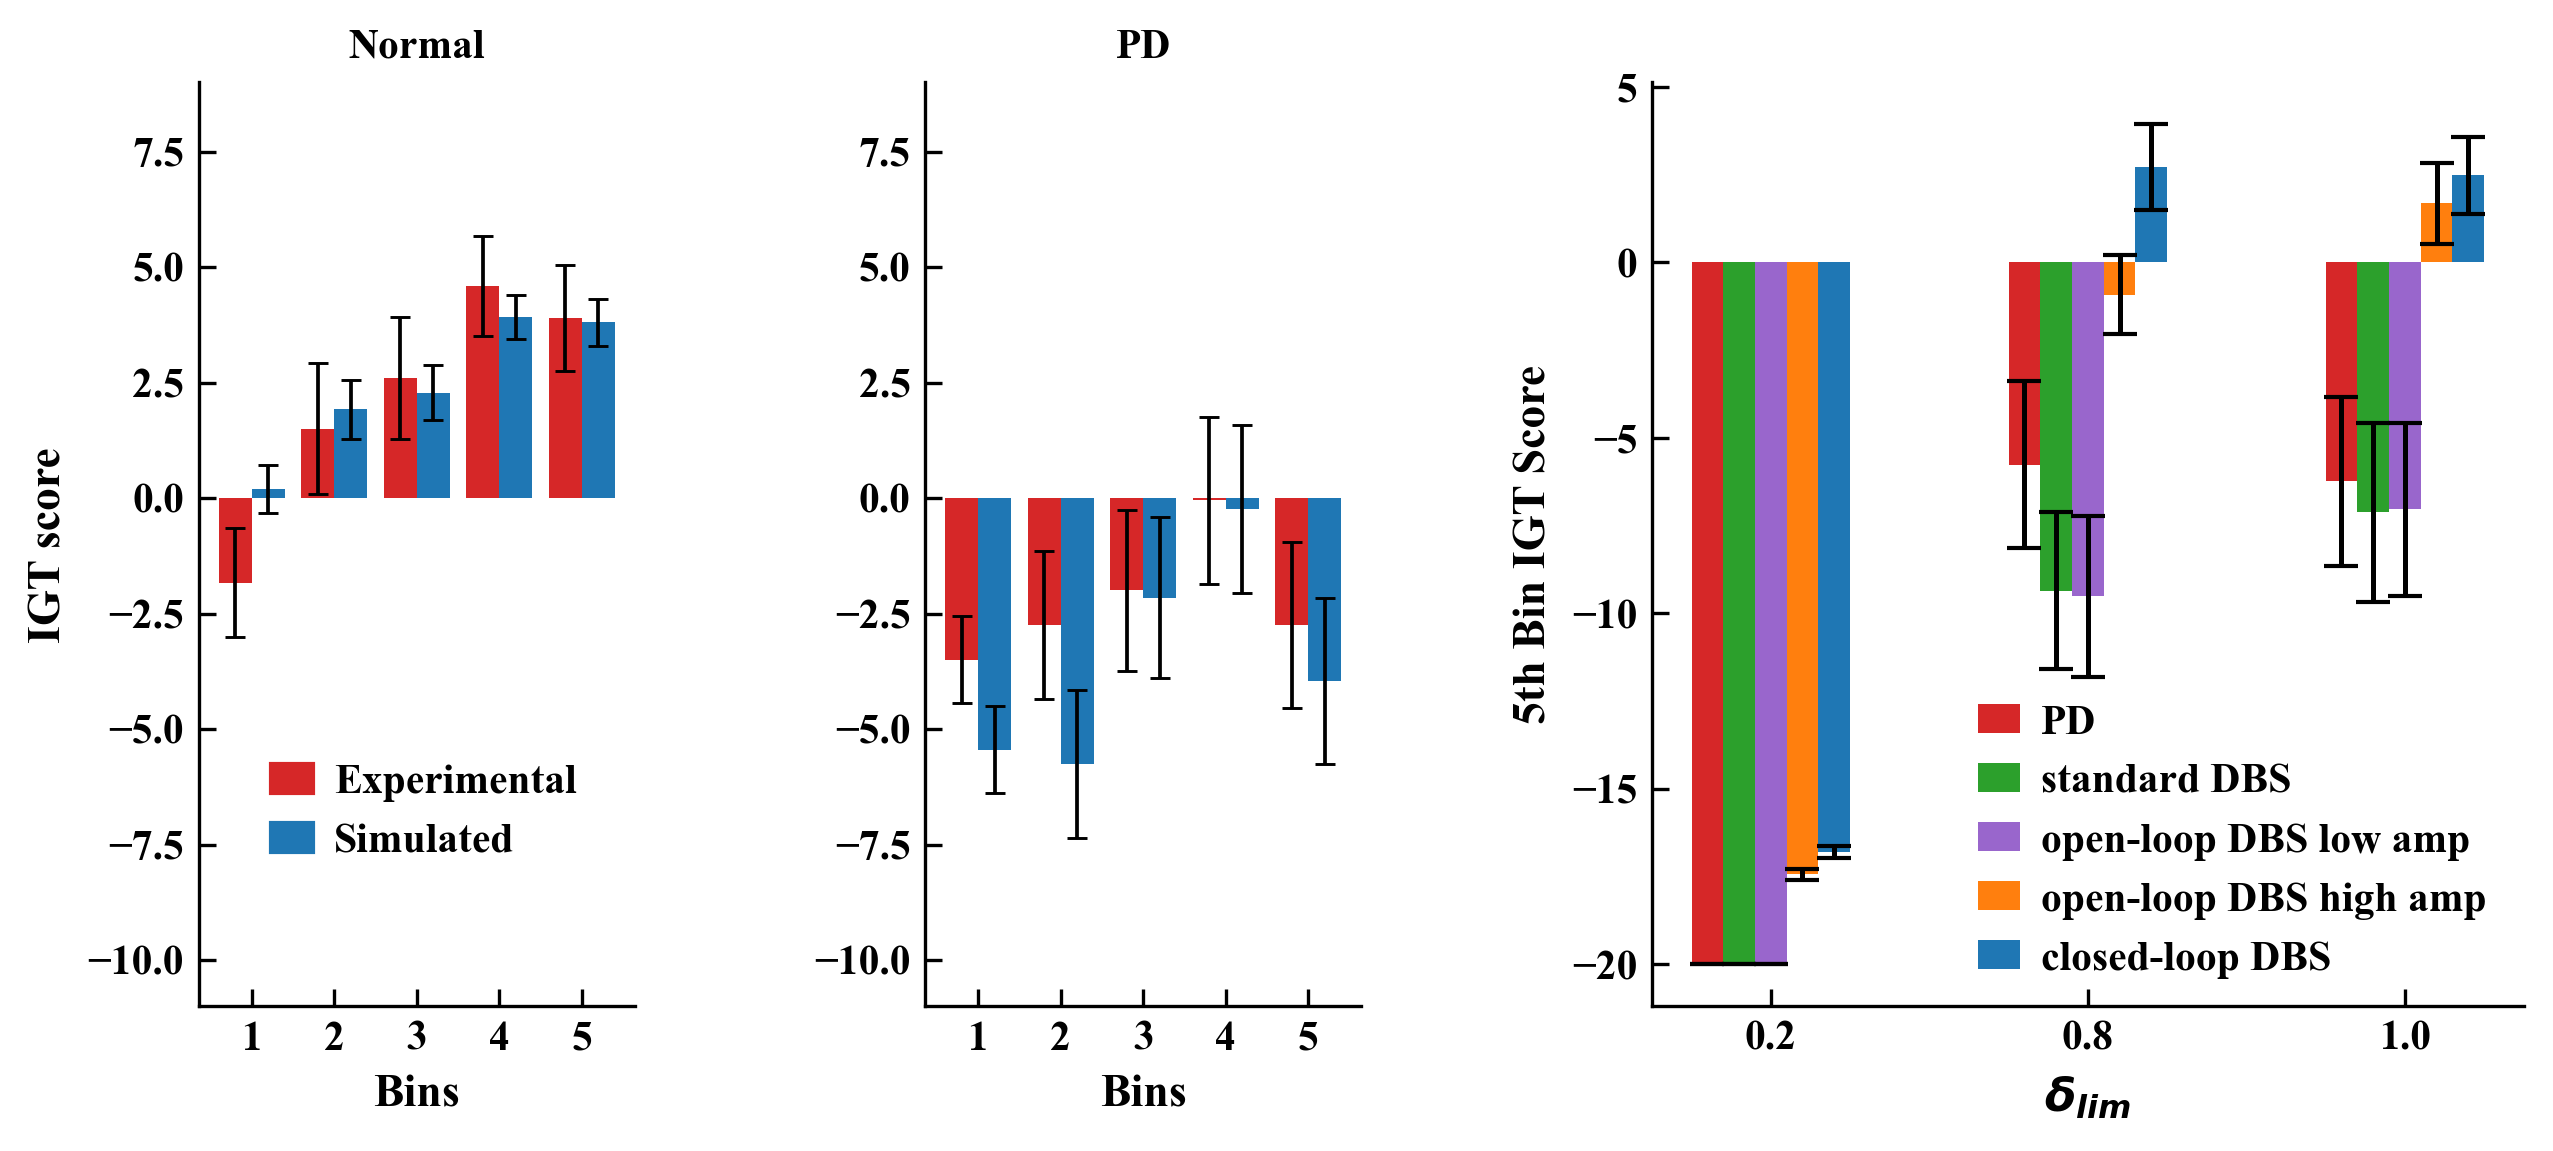

In [13]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 4), dpi=300, constrained_layout=False)
gs = gridspec.GridSpec(1, 3, width_ratios=[0.5, 0.5, 1])
bar_width = 0.4
# bar_width = 0.4
colors = {
    'Experimental': '#d62728',     # dark orange
    'Simulated': '#1f77b4'   # dark blue
}
error_colors = {
    'Experimental': '#000000',     # dark blue
    'Simulated': '#000000'   # dark orange/brown
}
# --- Subplot 1: Normal ---
ax1 = fig.add_subplot(gs[0])
ax1.bar(BINS, IGT_experimental_normal, width=bar_width, color=colors['Experimental'], label='Experimental', alpha=alpha)
ax1.bar(BINS + bar_width, IGT_simulated_normal, width=bar_width, color=colors['Simulated'], label='Simulated', alpha=alpha)
ax1.errorbar(BINS, IGT_experimental_normal, yerr=IGT_std_experimental_normal / np.sqrt(n_expt_normal), fmt='none', ecolor=error_colors['Experimental'], elinewidth=0.9, capsize=2.5, capthick=0.7)
ax1.errorbar(BINS + bar_width, IGT_simulated_normal, yerr=IGT_std_simulated_normal / np.sqrt(n_sim_normal), fmt='none', ecolor=error_colors['Simulated'], elinewidth=0.9, capsize=2.5, capthick=0.7)
ax1.set_ylim(-11, 9)
ax1.set_xlabel('Bins')
ax1.set_ylabel('IGT score')
ax1.set_xticks(BINS + bar_width / 2)
ax1.set_xticklabels([str(b) for b in BINS])
ax1.set_title("Normal", fontsize=10, weight='bold')

# --- Subplot 2: PD ---
ax2 = fig.add_subplot(gs[1])
ax2.bar(BINS, IGT_experimental_pd, width=bar_width, color=colors['Experimental'], label='Experimental', alpha=alpha)
ax2.bar(BINS + bar_width, IGT_simulated_pd, width=bar_width, color=colors['Simulated'], label='Simulated', alpha=alpha)
ax2.errorbar(BINS, IGT_experimental_pd, yerr=IGT_std_experimental_pd / np.sqrt(n_expt_pd), fmt='none', ecolor=error_colors['Experimental'], elinewidth=0.9, capsize=2.5, capthick=0.7)
ax2.errorbar(BINS + bar_width, IGT_simulated_pd, yerr=IGT_std_simulated_pd / np.sqrt(n_sim_pd), fmt='none', ecolor=error_colors['Simulated'], elinewidth=0.9, capsize=2.5, capthick=0.7)
ax2.set_ylim(-11, 9)
ax2.set_xlabel('Bins')
ax2.set_xticks(BINS + bar_width / 2)
ax2.set_xticklabels([str(b) for b in BINS])
ax2.set_title("PD", fontsize=10, weight='bold')
handles = [
    plt.Rectangle((0,0),1,1, color=colors['Experimental'], label='Experimental'),
    plt.Rectangle((0,0),1,1, color=colors['Simulated'], label='Simulated')
]

fig.legend(handles=handles, loc='lower center', ncol=1, frameon=False, bbox_to_anchor=(0.2, 0.2))

# --- Subplot 3: DBS Comparison ---
bar_width = 0.1
ax3 = fig.add_subplot(gs[2])
x_values = np.arange(len(del_lim_values_PD))
ax3.bar(x_values - bar_width * 2, igt_scores_PD, width=bar_width, label="PD", alpha=alpha, color='#d62728', yerr=igt_errors_PD, capsize=4)
ax3.bar(x_values - bar_width, igt_scores_DBS_std, width=bar_width, label="standard DBS", alpha=alpha, color='#2ca02c', yerr=igt_errors_DBS_std, capsize=4)
ax3.bar(x_values, igt_scores_DBS_open_low, width=bar_width, label="open-loop DBS low amp", alpha=alpha, color='#9966cc', yerr=igt_errors_DBS_open_low, capsize=4)
ax3.bar(x_values + bar_width, igt_scores_DBS_open_high, width=bar_width, label="open-loop DBS high amp", alpha=alpha, color='#ff7f0e', yerr=igt_errors_DBS_open_high, capsize=4)
ax3.bar(x_values + bar_width * 2, igt_scores_DBS_closed, width=bar_width, label="closed-loop DBS", alpha=alpha, color='#1f77b4', yerr=igt_errors_DBS_closed, capsize=4)
ax3.set_xlabel(r"$\delta_{lim}$")
ax3.set_ylabel("5th Bin IGT Score")
ax3.legend(loc="lower right", frameon=False, bbox_to_anchor=(1.0, -0.01))
ax3.set_xticks(x_values)
ax3.set_xticklabels([f"{v:.1f}" for v in del_lim_values_PD], rotation=0)

fig.subplots_adjust(wspace = 0.5) 
# fig.tight_layout()
# if save_fig:
#     plt.savefig(f'{folder_name_png}/igt_scores_all_subplots.png', dpi=300, bbox_inches='tight')
#     plt.savefig(f'{folder_name_svg}/igt_scores_all_subplots.svg', dpi=300, bbox_inches='tight')
# plt.show()